# Введение

В качестве предметной области был выбран набор данных, содержащий информацию о различных характеристиках треков американского исполнителя Kendrick Lamar и их популярности.



Задача данной работы - предсказание популярности той или иной композиции на основе различных характеристик. Эта задача актуальна для музыкальных продюссеров, которые нацелены на продвижении коммерчески прибыльных музыкальных композиций.



Решение этой задачи может быть использовано музыкальными продюссерами и музыкальными лейблами для оценки того, какой формат музыки может стать наиболее комммерчески успешным. Полученные данные могут быть использованы для отслеживания музыкальных трендов и понимания запросов аудитории. Данное исследование актуально для конкретного исполнителя, но также результаты можно попробовать экстраполировать для применения к музыкальной индустрии в целом.





# Основная часть

## Поставновка задачи

Необходимо решить задачу регрессии по прогнозированию популярности треков исполнителя Kendrick Lamar с использованием материалов дисциплины «Технологии машинного обучения».

## Выбор набора данных для построения моделей машинного обучения

### Текстовое описание

Данный набор доступен по адресу: https://www.kaggle.com/datasets/ceebloop/kendrick-lamar-albumslyrics-dataset

Набор данных имеет следующие атрибуты:

*  **track_name** название трека
*  **album** название альбома
*  **release_date** дата выхода трека (YYYY-MM-DD)
*  **duration_ms** длительность трека
*  **popularity** популярность трека на аудиостримминговом сервисе Spotify.
*  **speechiness** оценка того, насколько трек текстосодержательный
*  **danceability** оценка того, насколько трек подходит для танцевальных движений
*  **tempo** темп трека в BPM
*  **lyrics** оценка того, насколько трек текстосодержательный

Решается задача регрессии. В качестве целевого признака - popularity.

### Импорт библиотек

Импортируем необходимые начальные библиотеки:

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

Загрузим данные:

In [3]:
data = pd.read_csv('/kaggle/input/kendrick-lamar-albumslyrics-dataset/discog_data.csv')

## Разведочный анализ данных

### Основные характеристики

Первые 5 строк датасета:

In [4]:
data.head()

,track_name,album,release_date,duration_ms,popularity,speechiness,danceability,tempo,lyrics
0,Growing Apart,Overly Dedicated,2010-09-14,220995,52,0.3660,0.586,106.835,Where are we going? Why are we slowing down?\n...
1,Ignorance Is Bliss,Overly Dedicated,2010-09-14,210494,55,0.3870,0.644,82.156,Lord forgive me\nKill him where he stand and s...
2,P&P 1.5,Overly Dedicated,2010-09-14,361942,54,0.3690,0.550,146.453,"Oh, what up ho? Oh, what up?\nI said, oh, what..."
3,Alien Girl,Overly Dedicated,2010-09-14,239973,51,0.0367,0.626,95.948,"She look better than Beyoncé, Alicia Keys, Hal..."
4,Opposites Attract,Overly Dedicated,2010-09-14,271909,53,0.4350,0.608,192.157,"Uh, yeah, uh, yeah\nUh, yeah, uh\nWe hurt peop..."


Размер датасета:

In [5]:
data.shape

(102, 9)

Столбцы:

In [6]:
data.columns

Index(['track_name', 'album', 'release_date', 'duration_ms', 'popularity',
       'speechiness', 'danceability', 'tempo', 'lyrics'],
      dtype='object')

Типы данных:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    102 non-null    object 
 1   album         102 non-null    object 
 2   release_date  102 non-null    object 
 3   duration_ms   102 non-null    int64  
 4   popularity    102 non-null    int64  
 5   speechiness   101 non-null    float64
 6   danceability  101 non-null    float64
 7   tempo         101 non-null    float64
 8   lyrics        102 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 7.3+ KB


### Обработка данных с неинформативными признаками

Удалим столбцы: "lyrics" и "track_name".

In [72]:
data = data.drop(["lyrics"], axis=1)
data = data.drop(["track_name"], axis=1)
data.describe()

,duration_ms,popularity,speechiness,danceability,tempo
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,268616.811881,64.861386,0.279678,0.616782,117.674020
std,99948.593846,10.198068,0.142468,0.135144,32.514402
min,75535.000000,47.000000,0.035800,0.301000,67.900000
25%,214120.000000,58.000000,0.194000,0.520000,91.066000
50%,256048.000000,64.000000,0.287000,0.608000,110.034000
75%,307880.000000,70.000000,0.377000,0.700000,139.956000
max,727106.000000,96.000000,0.750000,0.959000,192.157000


### Обработка пропусков

Определим столбцы с пропусками данных:

In [73]:
data.isnull().sum()

album           0
release_date    0
duration_ms     0
popularity      0
speechiness     0
danceability    0
tempo           0
dtype: int64

Видим, что в наборе данных отсутствуют пропуски.

In [74]:
# Удалим строки с пропущенными значениями
data.dropna(inplace=True)

### Структура данных

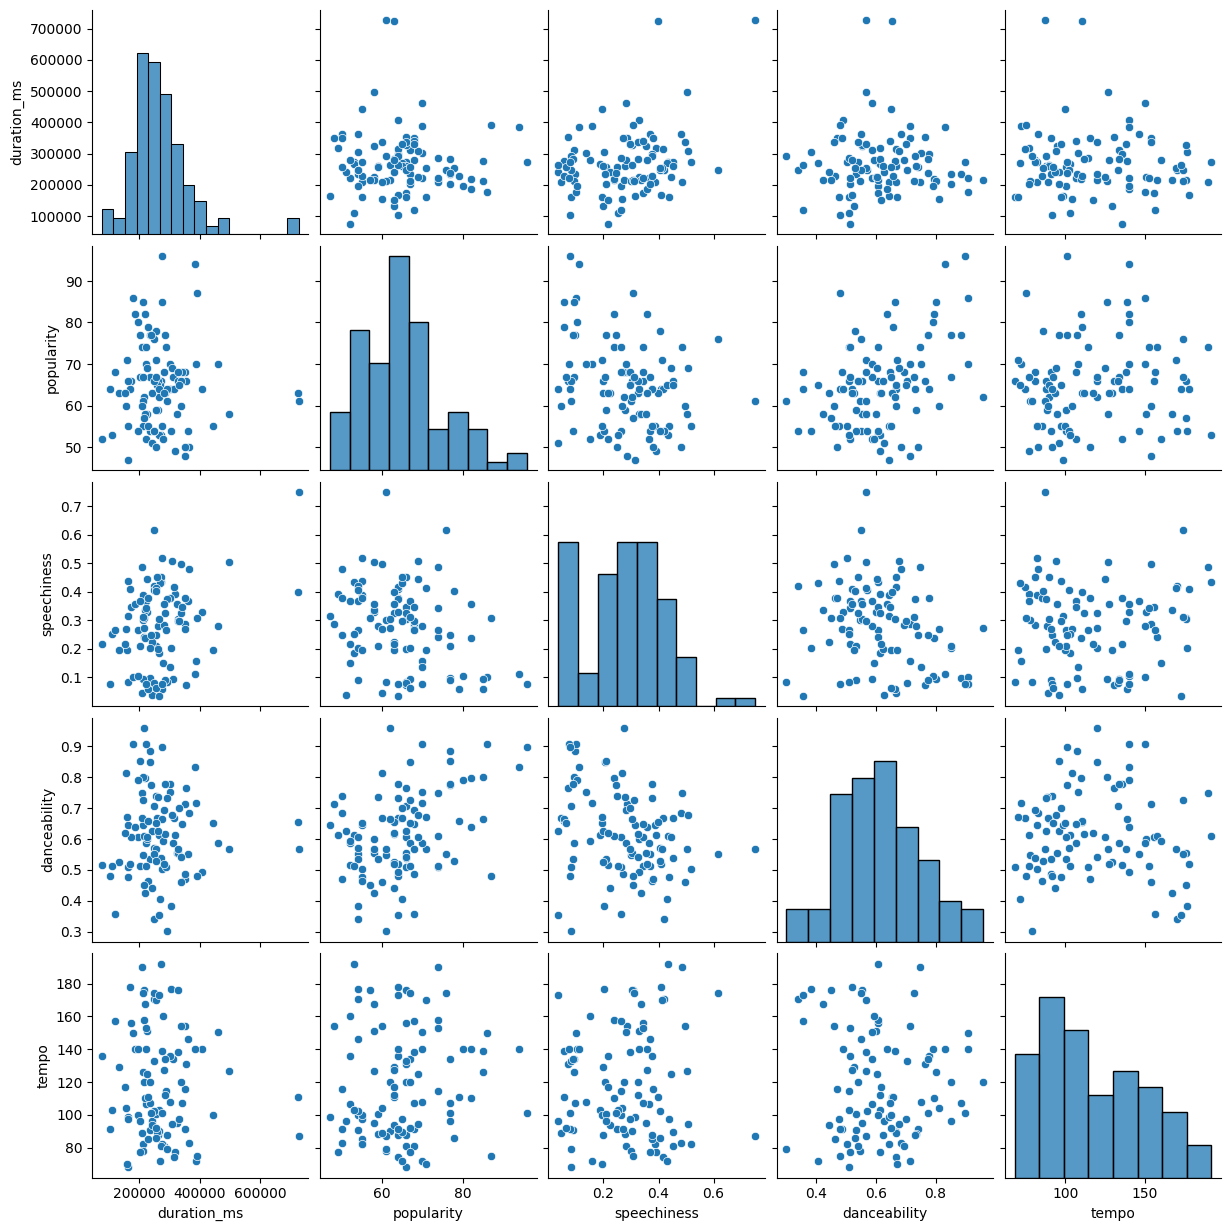

In [75]:
sns.pairplot(data)

Сразу можем заметить, что корреляция в данных отсутствует.

### Кодирование категориальных признаков

Используя LabelEncoder из sckit-learn закодируем некоторые столбцы типа Object в числовые значения:

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['track_name', 'album', 'release_date']


In [76]:
label_data = data.copy()

# Закодируем album через LabelEncoder
label_encoder = LabelEncoder()
label_data['album'] = label_encoder.fit_transform(label_data['album'])
    
# Превратим release_date в timestamp
label_data['release_date'] = pd.to_datetime(label_data['release_date'])

# Превратим release_date в две колонки: year и month
label_data['release_year'] = label_data['release_date'].dt.year
label_data['release_month'] = label_data['release_date'].dt.month
label_data.drop(['release_date'], axis=1, inplace=True)

label_data.head()

,album,duration_ms,popularity,speechiness,danceability,tempo,release_year,release_month
0,3,220995,52,0.3660,0.586,106.835,2010,9
1,3,210494,55,0.3870,0.644,82.156,2010,9
2,3,361942,54,0.3690,0.550,146.453,2010,9
3,3,239973,51,0.0367,0.626,95.948,2010,9
4,3,271909,53,0.4350,0.608,192.157,2010,9


In [77]:
label_data.describe()


,album,duration_ms,popularity,speechiness,danceability,tempo,release_year,release_month
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.594059,268616.811881,64.861386,0.279678,0.616782,117.674020,2015.287129,5.900990
std,2.131564,99948.593846,10.198068,0.142468,0.135144,32.514402,4.359671,2.559316
min,0.000000,75535.000000,47.000000,0.035800,0.301000,67.900000,2010.000000,3.000000
25%,2.000000,214120.000000,58.000000,0.194000,0.520000,91.066000,2011.000000,4.000000
50%,4.000000,256048.000000,64.000000,0.287000,0.608000,110.034000,2015.000000,5.000000
75%,5.000000,307880.000000,70.000000,0.377000,0.700000,139.956000,2017.000000,9.000000
max,7.000000,727106.000000,96.000000,0.750000,0.959000,192.157000,2024.000000,10.000000


### Масштабирование данных

Проведем масштабирование данных MinMax с помощью средств из sckit-learn:

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(label_data[label_data.columns])

In [81]:
data_scaled = pd.DataFrame()

In [82]:
for i in range(len(label_data.columns)):
    col = label_data.columns[i]
    new_col_name = col
    data_scaled[new_col_name] = scaler_data[:,i]

In [83]:
data_scaled.head()

,album,duration_ms,popularity,speechiness,danceability,tempo,release_year,release_month
0,0.428571,0.223245,0.102041,0.462335,0.433131,0.313343,0.0,0.857143
1,0.428571,0.207129,0.163265,0.491739,0.521277,0.114730,0.0,0.857143
2,0.428571,0.439564,0.142857,0.466536,0.378419,0.632182,0.0,0.857143
3,0.428571,0.252372,0.081633,0.001260,0.493921,0.225726,0.0,0.857143
4,0.428571,0.301385,0.122449,0.558947,0.466565,1.000000,0.0,0.857143


Масштабирование данных не повлияло на распределение данных:

In [ ]:
for col in label_data.columns:
    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(label_data[col], 50)
    ax[1].hist(data_scaled[col], 50)
    ax[0].title.set_text(col)
    plt.show()

## Корреляционный анализ данных

Построим корреляционные матрицы:

In [ ]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

Корреляционная матрица показала слабую корреляцию, кроме признака release_year и целевого признака popularity.

## Выбор подходящих моделей для решения задачи регрессии

- Линейная регрессия
- Модель ближайших соседей
- Модель опорных векторов
- Дерево решений
- Случайный лес
- Градиентный бустинг

## Выбор метрик для оценки качества моделей

В качестве метрик для решения задачи регрессии будем использовать метрики:

- Mean absolute error (средняя абсолютная ошибка)
- Mean squared error (средняя квадратичная ошибка)
- R2-score (коэффициент детерминации)

Они помогут определить качество моделей.

Метрики будем сохранять в класс:

## Формирование обучающей и тестовой выборок

Разделим выборку:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= data_scaled.drop(["popularity"],axis =1)
y= data_scaled["popularity"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

## Построение базового решения (baseline) без подбора гиперпараметров

Построим базовые модели:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
models = {
    'LR': LinearRegression(),
    'KNN_20': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(),
    'Tree': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'GB': GradientBoostingRegressor()
}

metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R2': r2})

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

Отсортируем модели по значениям метрик (выше - с лучшим значением метрик)

In [ ]:
sorted_by_metrics = {
    'MSE': np.array(list(map(lambda y: y['Model'], sorted(metrics, key=lambda x: x['MSE'], reverse=True)))),
    'MAE': list(map(lambda y: y['Model'], sorted(metrics, key=lambda x: x['MAE'], reverse=True))),
    'R2': list(map(lambda y: y['Model'], sorted(metrics, key=lambda x: x['R2'], reverse=False))),
}
print(pd.DataFrame(sorted_by_metrics))

## Подбор оптимальной модели и гиперпараметра

In [ ]:
from sklearn.model_selection import GridSearchCV

# Задаем сетку гиперпараметров для Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # количество деревьев в лесу
    'max_depth': [None, 10, 20],  # максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],  # минимальное количество выборок, необходимое для разделения узла
    'min_samples_leaf': [1, 2, 4]  # минимальное количество выборок в листовом узле, имеет приоритет над min_samples_split
}

# Создаем экземпляр модели Random Forest
rf = RandomForestRegressor()

# Инициализируем GridSearchCV с моделью и сеткой гиперпараметров
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Выполняем поиск по сетке на обучающих данных
grid_search.fit(X_train, y_train)

# Получаем наилучшие гиперпараметры
best_params = grid_search.best_params_
print("Наилучшие гиперпараметры:", best_params)

# Получаем лучшую модель
best_rf_model = grid_search.best_estimator_

In [ ]:
y_best_random_forest = best_rf_model.predict(X_test)

In [ ]:
name = 'RF'
mae = mean_absolute_error(y_test, y_best_random_forest)
mse = mean_squared_error(y_test, y_best_random_forest)
r2 = r2_score(y_test, y_best_random_forest)
print(f"{name} \t MAE={mae:.3f}, MSE={mse:.3f}, R2={r2:.3f}")

In [ ]:
# График для MAE
plt.figure(figsize=(10, 6))
metrics_df_sorted_mae = metrics_df.sort_values(by='MAE')
sns.barplot(x='Model', y='MAE', data=metrics_df_sorted_mae)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xticks(rotation=45)
plt.show()

# График для MSE
plt.figure(figsize=(10, 6))
metrics_df_sorted_mse = metrics_df.sort_values(by='MSE')
sns.barplot(x='Model', y='MSE', data=metrics_df_sorted_mse)
plt.title('Mean Squared Error (MSE) Comparison')
plt.xticks(rotation=45)
plt.show()

# График для R2
plt.figure(figsize=(10, 6))
metrics_df_sorted_r2 = metrics_df.sort_values(by='R2')
sns.barplot(x='Model', y='R2', data=metrics_df_sorted_r2)
plt.title('R-squared (R2) Comparison')
plt.xticks(rotation=45)
plt.show()

По данным графикам можно понять, что случайное дерево является фаворитом над остальными моделями. Хуже всего себя показала линейеная регрессия

# Заключение

В работе был  проведен разведочный анализ данных с обработкой данных с неинформативными признаками, пропусков и модификацией структуры и самих данных. Также было проведено кодирование категориальных признаков, масштабирование данных и сравнение масштабированных данных с исходными. Был выполнен корреляционный анализ и на его основании были выбраны модели для решения задачи регрессии. Исходные данные были разделены на тестовую и обучающую выборку, на основе этих выборок были обучены выбранные модели. Также была построена наиболее оптимальная модель. Все модели подверглись сравнению для определения наилучшего качества решения задачи регрессии, для этого использовались несколько метрик регрессии.